In [30]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()
oo = sym.Dummy('oo', prime=True)
very_small = 1/oo
x = sym.symbols('x')

C_1, C_2, C_3, C_4 = sym.symbols('C_1, C_2, C_3, C_4')
A_v, B_v, C_v = sym.symbols('A_v, B_v, C_v')
ql, Vl, Ml, kappal, phil, wl = sym.symbols('q_z, V, M, kappa, phi, w')

In [2]:
sym.SingularityFunction(0,0,0)

In [33]:
Q = 10
L = 15
a = 4
b = 5
F = 35

EI = sym.symbols('EI')
# Q, F = sym.symbols('Q, F')

q =  A_v * sym.SingularityFunction(x,0,-1) + Q * sym.SingularityFunction(x,0,0) - Q * sym.SingularityFunction(x,a,0) + F * sym.SingularityFunction(x, a+b, -1) + B_v * sym.SingularityFunction(x,a,-1) + C_v * sym.SingularityFunction(x,L,-1)
display(q)

q_{z} = A_{v} {\left\langle x \right\rangle}^{-1} + B_{v} {\left\langle x - 4 \right\rangle}^{-1} + C_{v} {\left\langle x - 15 \right\rangle}^{-1} + 10 {\left\langle x \right\rangle}^{0} - 10 {\left\langle x - 4 \right\rangle}^{0} + 35 {\left\langle x - 9 \right\rangle}^{-1}


In [37]:
V = -sym.integrate(q, x) + C_1
display(V)
M = sym.integrate(V, x) + C_2
display(M)
kappa = M/EI + 1/(2*EI)*sym.SingularityFunction(x,9,0)*(A_v*9 + B_v*5 + Q*4*7) + 1/(2*EI)*sym.SingularityFunction(x,9,1)*(A_v + B_v + Q*4+F)
# kappa = (-A_v/EI)*sym.SingularityFunction(x,0,1) + (A_v*9/(2*EI))*sym.SingularityFunction(x,9,0) + (A_v/(2*EI))*sym.SingularityFunction(x,9,1) - (B_v/EI)*sym.SingularityFunction(x,4,1) + (5*B_v/(2*EI))*sym.SingularityFunction(x,9,0) + (B_v/(2*EI))*sym.SingularityFunction(x,9,1) - (C_v/(2*EI))*sym.SingularityFunction(x,15,1) - (F/(2*EI))*sym.SingularityFunction(x,9,1) - (Q/EI)*sym.SingularityFunction(x,0,2) + (81*Q/(2*EI))*sym.SingularityFunction(x,9,0) + (Q/(2*EI))*sym.SingularityFunction(x,9,2) + (18*Q/(2*EI))*sym.SingularityFunction(x,9,1) + (Q/EI)*sym.SingularityFunction(x,4,2) - (25*Q/(2*EI))*sym.SingularityFunction(x,9,0) - (Q/(2*EI))*sym.SingularityFunction(x,9,2) - (10*Q/(2*EI))*sym.SingularityFunction(x,9,1) + (C_1*x/(EI)) - (C_1*9/(2*EI))*sym.SingularityFunction(x,9,0) - (C_1/(2*EI))*sym.SingularityFunction(x,9,1) + (C_2/EI) - (C_2/(2*EI))*sym.SingularityFunction(x,9,0)
display(kappa)
# phi = (-A_v/(2*EI))*sym.SingularityFunction(x,0,2) + (9*A_v/(2*EI))*sym.SingularityFunction(x,9,1) + (A_v/(4*EI))*sym.SingularityFunction(x,9,2) - (B_v/(2*EI))*sym.SingularityFunction(x,4,2) + (5*B_v/(2*EI))*sym.SingularityFunction(x,9,1) + (B_v/(4*EI))*sym.SingularityFunction(x,9,2) - (C_v/(4*EI))*sym.SingularityFunction(x,15,2) - (Q/(3*EI))*sym.SingularityFunction(x,0,3) + (28*Q/(EI))*sym.SingularityFunction(x,9,1) + (Q/(3*EI))*sym.SingularityFunction(x,4,3) - (F/(4*EI))*sym.SingularityFunction(x,9,2) + (x*C_1/(EI))
# display(phi)

# kappa = M * ((1 / 10000) + (1 / 10000) * sym.SingularityFunction(x, 9, 0))
# display(kappa)
phi = sym.integrate(kappa, x) + C_3
display(phi)
w = -sym.integrate(phi, x) + C_4
display(w)
print(sym.latex(sym.Eq(ql,q)))
print(sym.latex(sym.Eq(Vl,V)))
print(sym.latex(sym.Eq(Ml,M)))
print(sym.latex(sym.Eq(kappal,kappa)))
print(sym.latex(sym.Eq(phil,phi)))
print(sym.latex(sym.Eq(wl,w)))

q_{z} = A_{v} {\left\langle x \right\rangle}^{-1} + B_{v} {\left\langle x - 4 \right\rangle}^{-1} + C_{v} {\left\langle x - 15 \right\rangle}^{-1} + 10 {\left\langle x \right\rangle}^{0} - 10 {\left\langle x - 4 \right\rangle}^{0} + 35 {\left\langle x - 9 \right\rangle}^{-1}
V = - A_{v} {\left\langle x \right\rangle}^{0} - B_{v} {\left\langle x - 4 \right\rangle}^{0} + C_{1} - C_{v} {\left\langle x - 15 \right\rangle}^{0} - 10 {\left\langle x \right\rangle}^{1} + 10 {\left\langle x - 4 \right\rangle}^{1} - 35 {\left\langle x - 9 \right\rangle}^{0}
M = - A_{v} {\left\langle x \right\rangle}^{1} - B_{v} {\left\langle x - 4 \right\rangle}^{1} + C_{1} x + C_{2} - C_{v} {\left\langle x - 15 \right\rangle}^{1} - 5 {\left\langle x \right\rangle}^{2} + 5 {\left\langle x - 4 \right\rangle}^{2} - 35 {\left\langle x - 9 \right\rangle}^{1}
\kappa = \frac{\left(A_{v} + B_{v} + 75\right) {\left\langle x - 9 \right\rangle}^{1}}{2 EI} + \frac{\left(9 A_{v} + 5 B_{v} + 280\right) {\left\langle x - 9 \r

In [40]:
Eq1 = sym.Eq(w.subs(x,0),0)
Eq2 = sym.Eq(w.subs(x,L),0)
Eq3 = sym.Eq(M.subs(x,0),0)
Eq4 = sym.Eq(M.subs(x,L),0)
Eq5 = sym.Eq(V.subs(x,0-very_small),0).subs(oo,sym.oo)
Eq6 = sym.Eq(V.subs(x,L+very_small),0).subs(oo,sym.oo)
Eq7 = sym.Eq(w.subs(x,a),0)
display(Eq1, Eq2, Eq3, Eq4, Eq5, Eq6, Eq7)
print(sym.latex(Eq1))
print(sym.latex(Eq3))
print(sym.latex(Eq2))
print(sym.latex(Eq4))
print(sym.latex(Eq5))
print(sym.latex(Eq6))
print(sym.latex(Eq7))

C_{4} = 0
C_{2} = 0
- 15 C_{3} + C_{4} - \frac{18 \left(A_{v} + B_{v} + 75\right)}{EI} - \frac{9 \cdot \left(9 A_{v} + 5 B_{v} + 280\right)}{EI} - \frac{- \frac{1125 A_{v}}{2} - \frac{1331 B_{v}}{6} + \frac{1125 C_{1}}{2} + \frac{225 C_{2}}{2} - \frac{48760}{3}}{EI} = 0
- 15 A_{v} - 11 B_{v} + 15 C_{1} + C_{2} - 730 = 0
C_{1} = 0
- A_{v} - B_{v} + C_{1} - C_{v} - 75 = 0
- 4 C_{3} + C_{4} - \frac{- \frac{32 A_{v}}{3} + \frac{32 C_{1}}{3} + 8 C_{2} - \frac{320}{3}}{EI} = 0


In [43]:
sol = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7),(C_1,C_2,C_3,C_4,A_v,B_v,C_v))
display(sol)
display(w.subs(sol).factor(EI))
print(sym.latex(sol))

\left\{ A_{v} : - \frac{47605}{6828}, \  B_{v} : - \frac{129405}{2276}, \  C_{1} : 0, \  C_{2} : 0, \  C_{3} : \frac{41350}{5121 EI}, \  C_{4} : 0, \  C_{v} : - \frac{19070}{1707}\right\}


In [7]:
w_numpy = sym.lambdify(x, w.subs(sol).subs(EI,10000).rewrite(sym.Piecewise))

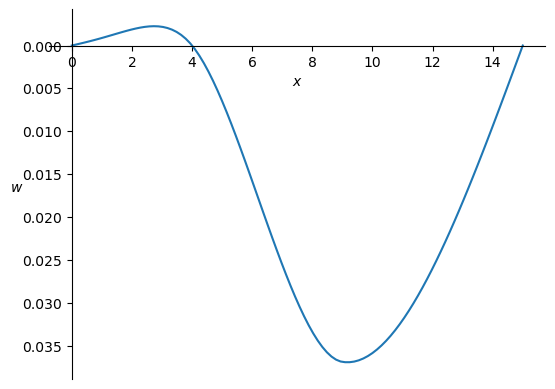

In [8]:
x_numpy = np.linspace(0,15,100)
plt.figure()
plt.plot(x_numpy,w_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$w$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [9]:
V_numpy = sym.lambdify(x, V.subs(sol).rewrite(sym.Piecewise))

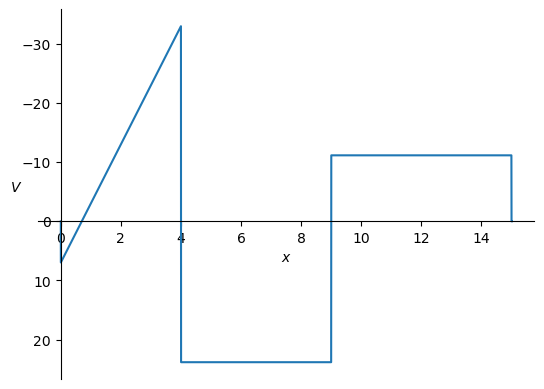

In [10]:
x_numpy = np.linspace(0,15.01,10000)
plt.figure()
plt.plot(x_numpy,V_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$V$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [11]:
M_numpy = sym.lambdify(x, M.subs(sol).rewrite(sym.Piecewise))

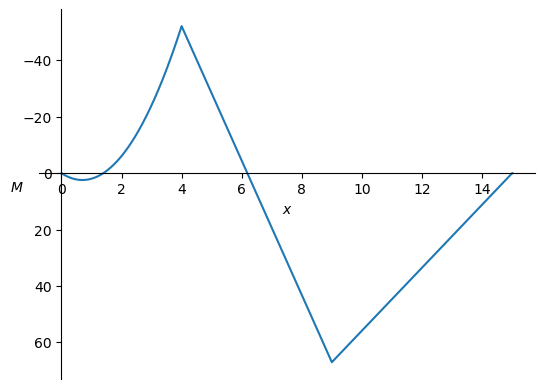

In [12]:
x_numpy = np.linspace(0,15.01,10000)
plt.figure()
plt.plot(x_numpy,M_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$M$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [13]:
kappa_numpy = sym.lambdify(x, kappa.subs(sol).subs(EI,10000).rewrite(sym.Piecewise))

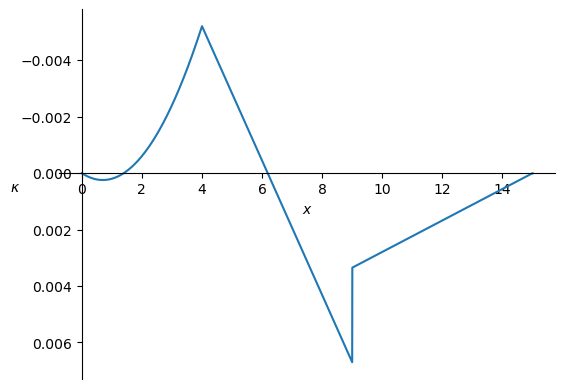

In [14]:
x_numpy = np.linspace(0,15.01,10000)
plt.figure()
plt.plot(x_numpy,kappa_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$\kappa$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()